# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 09 ноября 18:00 Сдача **очная** на онлайн занятии. <br\>


Используйте данный Ipython Notebook при оформлении домашнего задания.

Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0920, Задание 2] Фамилия Имя.



**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

***Ваше решение здесь***

$$\bigtriangledown L(w) =  \frac{1}{N}\sum_i \bigtriangledown(y_i - a_i) ^ 2  + \frac{1}{C}\sum_{j=1}^{D} \bigtriangledown w_j^2  = \frac{1}{N}\sum_i 2(x_i*w - a_i)x_i  + \frac{1}{C}\sum_{j=1}^{D}2w_j = $$
$$ = \frac{2}{N}\sum_i(x_i*w - a_i)x_i  + \frac{2}{C}w $$

$$ w_{new} = w_{old} - \frac{2}{N}\sum_i(x_i*w - a_i)x_i  - \frac{2}{C}w$$

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

***Ваше решение здесь***

$$\bigtriangledown L(w) = - \frac{1}{N}\sum_i [ y_i \bigtriangledown \log ( \frac{1}{1 + e^{-x_iw}} ) + ( 1 - y_i)\bigtriangledown \log (1 - \frac{1}{1 + e^{-x_iw}}) ] + \frac{1}{C}\sum_{j=1}^{D} \bigtriangledown w_j^2 = $$
$$ = - \frac{1}{N}\sum_i [ y_i(1 + e^{-x_iw})(-1)\frac{1}{(1 + e^{-x_iw})^{2}}(-x_i)e^{-x_iw} + ( 1 - y_i)  \frac{1 + e^{-x_iw}}{e^{-x_iw}}(-1)\frac{-1}{(1 + e^{-x_iw})^{2}}(-x_i)e^{-x_iw} ] + \frac{1}{C}\sum_{j=1}^{D}2w_j  = $$
$$ = - \frac{1}{N}\sum_i \frac{1}{1 + e^{-x_iw}}[ y_ie^{-x_iw}x_i -x_i  + y_ix_i] + \frac{2}{C}w = 
- \frac{1}{N}\sum_i ( y_i - \frac{1}{1 + e^{-x_iw}})x_i + \frac{2}{C}w $$

$$ w_{new} = w_{old} + \frac{1}{N}\sum_i ( y_i - \frac{1}{1 + e^{-x_iw}})x_i - \frac{2}{C}w $$

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

***Ваше решение здесь***

Дост. усл-ие минимума в критической точке - $H$ положит. определенная.

$$\bigtriangledown L(w) = \frac{2}{N}(X^TXw-X^Ty) = \frac{2}{N}(X^TXX^{-1}(X^T)^{-1}Y - X^Ty) = \frac{2}{N}(X^Ty-X^Ty) = 0$$
Следовательно, критич. точка.

$$\frac{\partial L(w) }{\partial w_i} = ...$$

$$H(w) = \sum_{i=1}^{n} \sum_{i=1}^{n} a_{ij}w_iw_j$$

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

***Ваше решение здесь***

Т.к. нужно найти минимизирующее $a(x)$, то дифф-ть будет тоже по $a(x)$.

Пусть $p(y_i = 1 |x_i ) = p$, тогда $p(y_i = 0 | x_i) = 1 - p$

$$ E'(a) = - \frac{p}{a} + \frac{1 - p}{1 - a} = \frac{a - pa - p + ap}{a(1-a)} = \frac{a - p}{(1-a)a} $$

Следовательно, при $a=p$ достигается экстремум, и это $min$, т.к. при $a>p$ $E'(a)>0$, и при $a<p$ $E'(a)>0$

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

***Ваше решение здесь***

Нет, не нужно.

Во-первых, мы используем регуляризацию для того, чтобы веса, соответствующие сильно коррелирующимеся на train признаками, не принимали больших значений(к ним можно прибавить их л.к., соответсвующую xi*wi + xj*wj = 0, умноженную на любую константу C). Следовательно, т.к. признак при w0 (константа 1) не может сильно коррелировать с другими признаками, то необходимость использовать w0 в регуляризации отпадает.

Во-вторых, например, в частном случае с объектами с 2-мя признаками разделяющая гиперплоскость(прямая) далеко не всегда должна пересекать оси в т.(0, 0), что не будет выполняться, если w0 будем использовать в регуляризации.

#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [8]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [9]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [10]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [11]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [2]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
 
    X_copy = X.copy()
    y_copy = y.copy()
   
    if shuffle:
        perm = np.random.permutation(len(y))
        for i in range(len(perm)):
            x_buf = X_copy[i].copy()
            y_buf = y_copy[i].copy()
            X_copy[i] = X_copy[perm[i]].copy()
            y_copy[i] = y_copy[perm[i]].copy()
            X_copy[perm[i]] = x_buf
            y_copy[perm[i]] = y_buf
            
    for i in range(X.shape[0]//batch_size):
        X_batch = X_copy[i*batch_size:(i+1)*batch_size, :]
        y_batch = y_copy[i*batch_size:(i+1)*batch_size]
        yield (X_batch, y_batch)
        
    if (X.shape[0] % batch_size != 0):
        X_batch = X_copy[(i+1)*batch_size:, :]
        y_batch = y_copy[(i+1)*batch_size:]
        yield (X_batch, y_batch) 

                   
# Теперь можно сделать генератор по данным ()
#  my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [6]:
#%%pycodestyle

def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    return 1/(1 + np.exp(-x))


from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10, model_type='lin_reg', th=0.5):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = []
        self.mean_loss = []
        self.model_type = model_type
        self.th = th
        
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        if self.model_type=='lin_reg':
            loss = ( (X_batch.dot(self.weights)-y_batch).T.dot(X_batch.dot(self.weights)-y_batch)/X_batch.shape[0] 
                    + self.weights[1:].T.dot(self.weights[1:])/self.C)
        elif self.model_type=='log_reg':
            loss = (-np.sum(y_batch*np.log(sigmoid(np.dot(X_batch, self.weights)))
                            +(1-y_batch)*np.log(1-sigmoid(np.dot(X_batch, self.weights))))/X_batch.shape[0]
                    + self.weights[1:].T.dot(self.weights[1:])/self.C )
        return loss
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        if self.model_type=='lin_reg':
            loss_grad = 2*X_batch.T@(X_batch@self.weights - y_batch)/(X_batch.shape[0]) + 2*self.weights/self.C
        elif self.model_type=='log_reg':
            loss_grad = -X_batch.T@(y_batch-sigmoid(X_batch@self.weights))/(X_batch.shape[0]) + 2*self.weights/self.C
        return loss_grad
    
    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights -= self.alpha*new_grad
    
    def fit(self, X, y, batch_size=1, shuffle=True):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        # Нужно инициализровать случайно веса
        self.weights = np.random.normal(size=X.shape[1])
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X, y, shuffle=shuffle, batch_size=batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)
                # Подумайте в каком месте стоит посчитать ошибку для отладки модели
                # До градиентного шага или после
                batch_loss = self.calc_loss(X_batch, y_batch)
                # После, т.к. мы уже обновили веса и нам нужно актуальное
                # значение ошибки, а не то, которое было до шага
                self.errors_log.append(batch_loss)
        return self
        
    def get_mean_loss(self, N):
        result = []
        for i in range(len(self.errors_log)//N):
            result.append(np.mean(self.errors_log[i*N:(i+1)*N]))
        if (i+1)*N < len(self.errors_log):
            result.append(np.mean(self.errors_log[(i+1)*N:]))
        return result

    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        X = np.hstack((X, np.ones((X.shape[0], 1))))
        y_hat = np.ones(X.shape[0])
        if self.model_type=='lin_reg':
            y_hat[np.dot(X, self.weights)<0.5] = 0
        elif self.model_type=='log_reg':
            y_hat[sigmoid(np.dot(X, self.weights))<self.th] = 0 
        # Желательно здесь использовать матричные операции между X и весами, например, numpy.dot 
        return y_hat

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [7]:
def plot_decision_boundary(clf):
    np.random.seed()
    clf.fit(X, y, batch_size=1, shuffle=True)
    w = clf.weights  
    x_ax = np.arange(-4, 8, 1, dtype='int')
    if clf.model_type=='lin_reg':
        y_ax = (0.5 - w[0] - w[1]*x_ax)/w[2]
    else:
        y_ax = (- w[0] - w[1]*x_ax)/w[2]
    plt.plot(x_ax, y_ax)
    print(clf.weights)
    return clf.weights
    

[-0.00167048  0.13967544 -0.11805126]


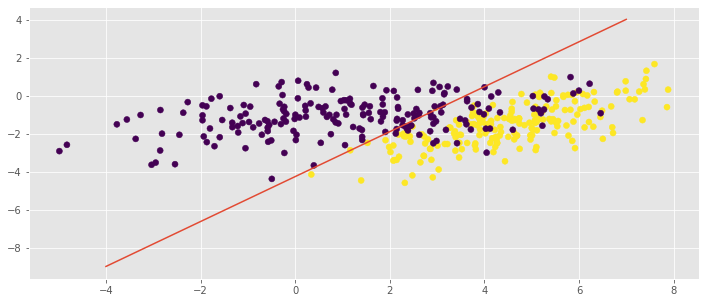

In [26]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

my_model = MySGDClassifier(batch_generator, C=1, alpha=0.01, max_epoch=10, model_type='lin_reg')
plot_decision_boundary(my_model)

plt.scatter(X[:,0], X[:,1], c=y)

[-2.1129388   0.48600387 -0.37293787]


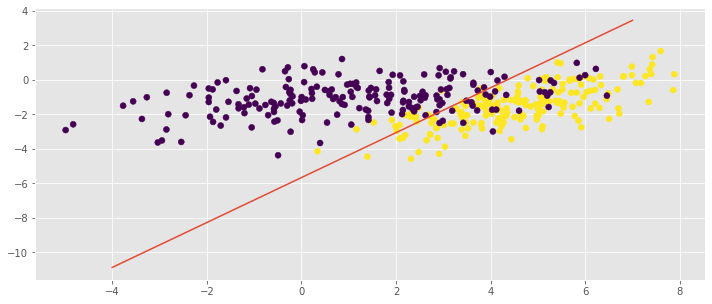

In [38]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

my_model = MySGDClassifier(batch_generator, C=100, alpha=0.01, max_epoch=10, model_type='log_reg')
plot_decision_boundary(my_model)

plt.scatter(X[:,0], X[:,1], c=y)

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [41]:
from sklearn.datasets import make_classification

In [42]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

In [61]:
my_lin_reg = MySGDClassifier(batch_generator, C=5, alpha=0.05, max_epoch=1, model_type='lin_reg')
my_lin_reg.fit(X, y, batch_size=1)
loss_1 = my_lin_reg.get_mean_loss(1000)

my_lin_reg = MySGDClassifier(batch_generator, C=5, alpha=0.01, max_epoch=1, model_type='lin_reg')
my_lin_reg.fit(X, y, batch_size=1)
loss_2 = my_lin_reg.get_mean_loss(1000)

my_lin_reg = MySGDClassifier(batch_generator, C=5, alpha=0.001, max_epoch=1, model_type='lin_reg')
my_lin_reg.fit(X, y, batch_size=1)
loss_3 = my_lin_reg.get_mean_loss(1000)

my_lin_reg = MySGDClassifier(batch_generator, C=5, alpha=0.0001, max_epoch=1, model_type='lin_reg')
my_lin_reg.fit(X, y, batch_size=1)
loss_4 = my_lin_reg.get_mean_loss(1000)

(0.0, 1.0)

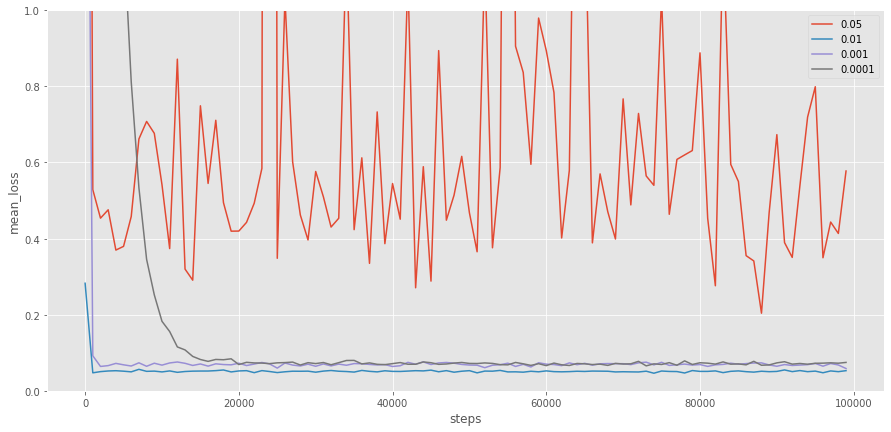

In [62]:
fig, ax = plt.subplots(figsize=(15, 7))

step_count = np.arange(len(loss_1))*1000
ax.plot(step_count, loss_1)
ax.plot(step_count, loss_2)
ax.plot(step_count, loss_3)
ax.plot(step_count, loss_4)
ax.legend(['0.05', '0.01', '0.001', '0.0001'])
ax.set_ylabel('mean_loss')
ax.set_xlabel('steps')
plt.ylim(0, 1)

In [63]:
my_lin_reg = MySGDClassifier(batch_generator, C=200, alpha=0.05, max_epoch=1, model_type='log_reg')
my_lin_reg.fit(X, y, batch_size=1)
loss_1 = my_lin_reg.get_mean_loss(1000)

my_lin_reg = MySGDClassifier(batch_generator, C=200, alpha=0.01, max_epoch=1, model_type='log_reg')
my_lin_reg.fit(X, y, batch_size=1)
loss_2 = my_lin_reg.get_mean_loss(1000)

my_lin_reg = MySGDClassifier(batch_generator, C=200, alpha=0.001, max_epoch=1, model_type='log_reg')
my_lin_reg.fit(X, y, batch_size=1)
loss_3 = my_lin_reg.get_mean_loss(1000)

my_lin_reg = MySGDClassifier(batch_generator, C=200, alpha=0.0001, max_epoch=1, model_type='log_reg')
my_lin_reg.fit(X, y, batch_size=1)
loss_4 = my_lin_reg.get_mean_loss(1000)

(0.0, 1.0)

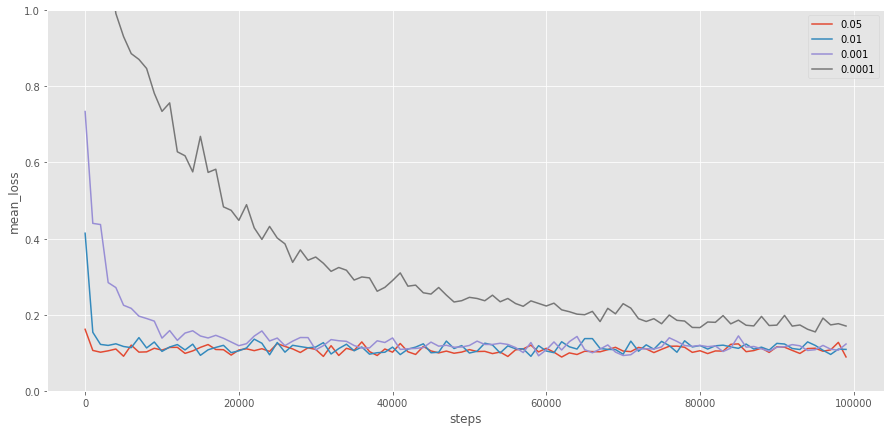

In [64]:
fig, ax = plt.subplots(figsize=(15, 7))

step_count = np.arange(len(loss_1))*1000
ax.plot(step_count, loss_1)
ax.plot(step_count, loss_2)
ax.plot(step_count, loss_3)
ax.plot(step_count, loss_4)
ax.legend(['0.05', '0.01', '0.001', '0.0001'])
ax.set_ylabel('mean_loss')
ax.set_xlabel('steps')
plt.ylim(0, 1)

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

При маленьком alpha метод сходится заметно медленнее, а при большом alpha линейная регрессия не сходится. Судя по графикам, лучшее значение alpha - 0.01.

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

In [77]:
c_lin = []
c_log = []
w_mean_lin = []
w_mean_log = []

In [78]:
for c in np.logspace(3, -3, 10):
    lin = MySGDClassifier(batch_generator, C=c, alpha=0.01, max_epoch=1, model_type='lin_reg')
    lin.fit(X, y, batch_size=1)
    c_lin.append(c)
    w_mean_lin.append(lin.weights[1:]@(lin.weights[1:].T)/(len(lin.weights)-1))

/home/dmitry/.local/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: overflow encountered in double_scalars
/home/dmitry/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
/home/dmitry/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in add
/home/dmitry/.local/lib/python3.6/site-packages/ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in subtract
/home/dmitry/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in matmul


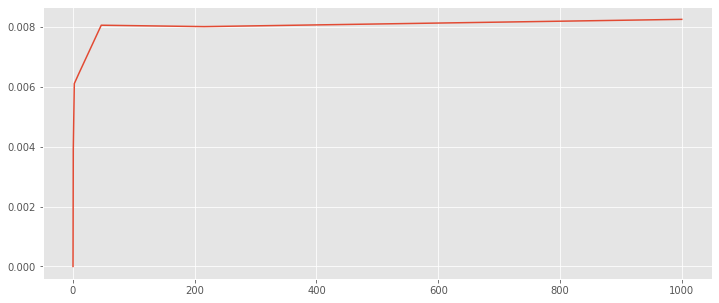

In [82]:
plt.plot(c_lin, w_mean_lin)

In [80]:
for c in np.logspace(3, -3, 10):
    log = MySGDClassifier(batch_generator, C=c, alpha=0.01, max_epoch=1, model_type='log_reg')
    log.fit(X, y, batch_size=1)
    c_log.append(c)
    w_mean_log.append(log.weights[1:]@(log.weights[1:].T)/(len(log.weights)-1))

/home/dmitry/.local/lib/python3.6/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
/home/dmitry/.local/lib/python3.6/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
/home/dmitry/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  
/home/dmitry/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log
/home/dmitry/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in multiply
/home/dmitry/.local/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: overflow encountered in double_scalars
/home/dmitry/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: RuntimeWarning: overflow encountered in true_divide
/home/dmitry/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in ma

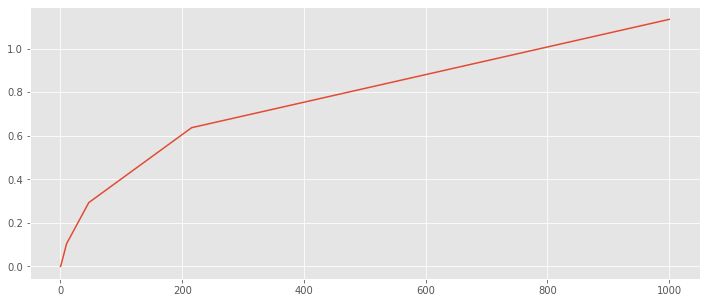

In [83]:
plt.plot(c_log, w_mean_log)

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

В логистической регресси веса уменьшились заметно, что меня радует, а вот в линейной разница небольшая. 

# Боевое применение (4  балла)

**Защита данной части возможна только при преодолении в проекте бейзлайна Handmade baseline.**

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [124]:
doc_to_title = {}
with open('docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))

28026


In [125]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [126]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


In [127]:
test_data = pd.read_csv('test_groups.csv')
test_groups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    #target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in test_groups_titledata:
        test_groups_titledata[doc_group] = []
    test_groups_titledata[doc_group].append((doc_id, title))

In [128]:
X_test = []
groups_test = []
for new_group in test_groups_titledata:
    docs = test_groups_titledata[new_group]
    for k, (doc_id, title) in enumerate(docs):
        groups_test.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15]    )
X_test = np.array(X_test)
groups_test = np.array(groups_test)
print (X_test.shape, groups_test.shape)

(16627, 15) (16627,)


In [50]:
lin_reg = MySGDClassifier(batch_generator, C=20, alpha=0.0001, max_epoch=20, model_type='lin_reg')
lin_reg.fit(X_train, y_train, batch_size=1)
loss_lin = lin_reg.get_mean_loss(500)

In [51]:
lin_reg.weights, loss_lin[-10:]

(array([-0.00276168,  0.02233396,  0.02553568,  0.00703636,  0.02263789,
        -0.01169959,  0.03665572, -0.00205487,  0.02954091,  0.02486993,
        -0.03927558,  0.0158847 ,  0.02149187,  0.00383722,  0.0205614 ,
         0.03477602]),
 [0.14013651512473507,
  0.14765861601814295,
  0.1456786797911221,
  0.1439141093532504,
  0.1544600243185596,
  0.1654408896088932,
  0.17151844006254804,
  0.1575660676205362,
  0.1544457419505665,
  0.13913784192411482])

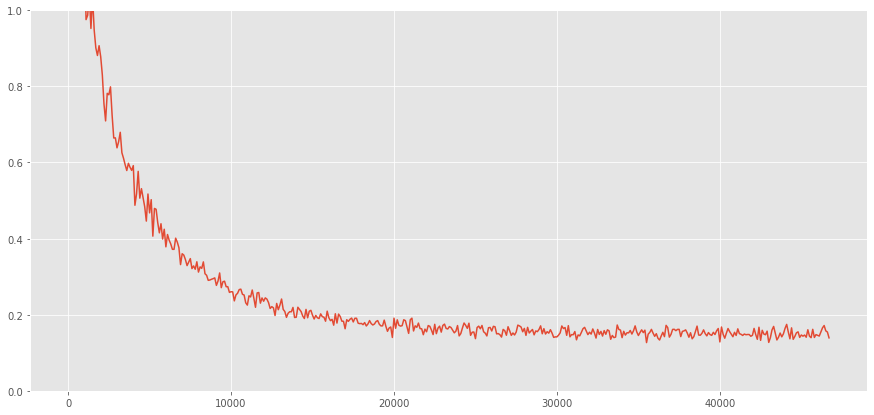

In [52]:
fig, ax = plt.subplots(figsize=(15, 7))

step_count = np.arange(len(loss_lin))*100
ax.plot(step_count, loss_lin)
plt.ylim(0, 1)
plt.show()

In [57]:
log_reg = MySGDClassifier(batch_generator, C=100, alpha=0.001, max_epoch=100, model_type='log_reg')
log_reg.fit(X_train, y_train, batch_size=10)
loss_log = log_reg.get_mean_loss(100)

In [58]:
log_reg.weights, loss_log[-10:]

(array([-0.09497212,  0.07424147,  0.08935128,  0.00394898,  0.03205765,
         0.07233883,  0.04532808,  0.06898915, -0.00736823,  0.10824   ,
         0.00278858,  0.0433486 , -0.00289734,  0.0219221 ,  0.15739769,
        -1.74544862]),
 [0.5278245964538073,
  0.5367678025187095,
  0.531037436277465,
  0.5199867965517602,
  0.4973714534574578,
  0.5137539218452598,
  0.5313710878022765,
  0.5092871168081969,
  0.5197324411716417,
  0.5225011568654214])

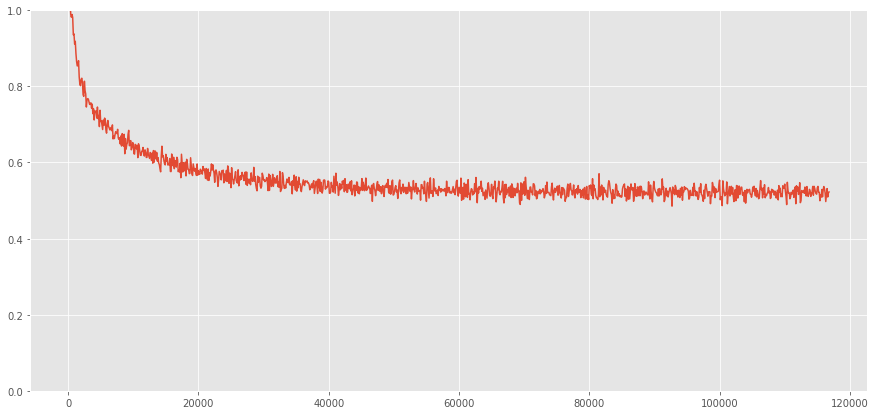

In [59]:
fig, ax = plt.subplots(figsize=(15, 7))

step_count = np.arange(len(loss_log))*100
ax.plot(step_count, loss_log)
plt.ylim(0, 1)
plt.show()

Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [86]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [87]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train, y_train)

In [163]:
def cross_val_score(clf, X, y, batch_size=1):
    score = []
    for i in range(12):
        X_val = X[np.logical_and(10*i<groups_train, groups_train<=10*(i+1))]
        y_val = y[np.logical_and(10*i<groups_train, groups_train<=10*(i+1))]
        X_train = X[np.logical_or(groups_train<=10*i, groups_train>10*(i+1))]
        y_train = y[np.logical_or(groups_train<=10*i, groups_train>10*(i+1))]
        log_reg.fit(X_train, y_train, batch_size=batch_size)
        y_pred = log_reg.predict(X_val)
        score.append(f1_score(y_val, y_pred))
    
    X_val, y_val = X[groups_train>120], y[groups_train>120]
    X_train, y_train = X[groups_train<=120], y[groups_train<=120]
    log_reg.fit(X_train, y_train, batch_size=batch_size)
    y_pred = log_reg.predict(X_val)
    score.append(f1_score(y_val, y_pred))
    
    return np.mean(score)

In [165]:
# chose btach_size
batch_list = [1, 5, 10, 25, 50, 100]
batch_score = []
for b_size in batch_list:
    my_reg = MySGDClassifier(batch_generator, C=10, alpha=0.001, max_epoch=1, model_type='lin_reg')
    batch_score.append(cross_val_score(my_reg, X_train, y_train, batch_size=b_size))
    print(batch_score[-1])

/home/dmitry/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log


KeyboardInterrupt: 

In [ ]:
plt.plot(batch_list, batch_score)

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [88]:
X_val, y_val = X_train[groups_train>=110], y_train[groups_train>=110]
X_train, y_train = X_train[groups_train<110], y_train[groups_train<110]

In [98]:
lin_reg = MySGDClassifier(batch_generator, C=20, alpha=0.0001, max_epoch=20, model_type='lin_reg')
lin_reg.fit(X_train, y_train, batch_size=1)
y_pred = lin_reg.predict(X_val)

In [99]:
f1_score(y_val, y_pred) 

0.5721877767936226

In [107]:
log_reg = MySGDClassifier(batch_generator, C=100, alpha=0.001, max_epoch=100, model_type='log_reg')
log_reg.fit(X_train, y_train, batch_size=10)
y_pred = log_reg.predict(X_val)

In [108]:
f1_score(y_val, y_pred)

0.6308724832214765

In [105]:
y_pred = log_reg.predict(X_val)
y_pred[:100]

array([1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0.,
       1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.])

In [106]:
y_val[:100]

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1])

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

In [137]:
100<groups_train

array([False, False, False, ...,  True,  True,  True])

In [148]:
my_reg = MySGDClassifier(batch_generator, C=100, alpha=0.001, max_epoch=10, model_type='lin_reg')
cv = cross_val_score(my_reg, X_train, y_train)

/home/dmitry/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log
/home/dmitry/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in multiply


0.23529411764705882
0.2932330827067669
0.6987951807228916
0.4061810154525386
0.6956521739130435
0.5695364238410596
0.2922077922077922
0.5882352941176472
0.407725321888412
0.5821596244131455
0.46258503401360546
0.5386819484240688
0.644793152639087


In [154]:
# chose C
C_list = [1, 3, 5, 10, 30, 50, 100, 200, 500, 1000]
C_score = []
for C in C_list:
    my_reg = MySGDClassifier(batch_generator, C=C, alpha=0.001, max_epoch=10, model_type='lin_reg')
    C_score.append(cross_val_score(my_reg, X_train, y_train))

/home/dmitry/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log
/home/dmitry/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in multiply


KeyboardInterrupt: 

In [149]:
plt.plot(C_list, C_score)

0.49346770476823976

In [161]:
# chose alpha
alpha_list = [0.1, 0.01, 0.001, 0.0001]
alpha_score = []
for alpha in alpha_list:
    my_reg = MySGDClassifier(batch_generator, C=10, alpha=alpha, max_epoch=5, model_type='lin_reg')
    alpha_score.append(cross_val_score(my_reg, X_train, y_train))
    print(alpha_score[-1])

/home/dmitry/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log
/home/dmitry/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in multiply


0.4793263052136527
0.48035614913843455
0.48175864058817114
0.48955619630723113


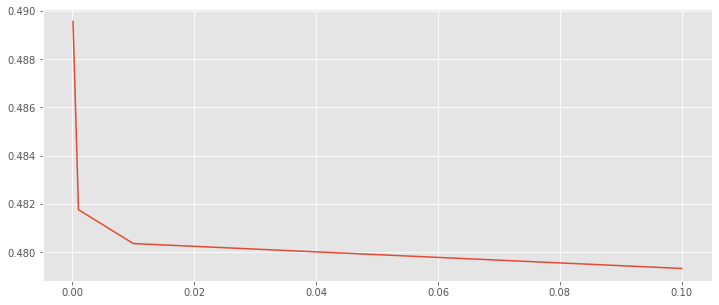

In [162]:
plt.plot(alpha_list, alpha_score)

In [169]:
my_reg = MySGDClassifier(batch_generator, C=50, alpha=0.0001, max_epoch=20, model_type='lin_reg')
cross_val_score(my_reg, X_train, y_train, batch_size=1)

0.5254830678468088

In [170]:
sub = pd.DataFrame({'pair_id': np.asarray(test_data['pair_id']), 'target': y_pred})
sub = sub.set_index(['pair_id'])
sub.to_csv('sub2.csv')

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук показать Ваш ник на kaggle, под которым Вы залили решение, которое побило Handmade baseline. **

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***